In [27]:
import pandas as pd
import tabula
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df_private_pel = pd.read_csv("private_resources_list.csv")
df_private_pel

,resource_name,resource_link,file_type,line
0,Entrada de passageiros por estação - Abril 2023,https://www.viaquatro.com.br/Media/ContentPage...,pdf,4
1,Entrada de passageiros por estação - Março 2023,https://www.viaquatro.com.br/Media/ContentPage...,pdf,4
2,Entrada de passageiros por estação - Fevereiro...,https://www.viaquatro.com.br/Media/ContentPage...,pdf,4
3,Entrada de passageiros por estação - Janeiro 2023,https://www.viaquatro.com.br/Media/ContentPage...,pdf,4
4,Entrada de passageiros por estação - Dezembro ...,https://www.viaquatro.com.br/Media/ContentPage...,pdf,4
...,...,...,...,...
385,Entrada de passageiros pelas linhas de bloquei...,https://www.viamobilidade.com.br/assets/viamob...,pdf,5
386,Passageiros transportados - Abril de 2023 Down...,https://www.viamobilidade.com.br/assets/viamob...,pdf,5
387,Passageiros transportados - Março de 2023 Down...,https://www.viamobilidade.com.br/assets/viamob...,pdf,5
388,Passageiros transportados - Fevereiro de 2023 ...,https://www.viamobilidade.com.br/assets/viamob...,pdf,5


In [3]:
links_l04_pel = df_private_pel.query(
    "resource_name.str.contains('Entrada de passageiros pelas linhas de bloqueio')"
     "& resource_name.str.contains('201[89]|202[0123]')"
     "& line == 4"
).reset_index(drop=True)
links_l04_pel

,resource_name,resource_link,file_type,line
0,Entrada de passageiros pelas linhas de bloquei...,https://www.viaquatro.com.br/Media/ContentPage...,pdf,4
1,Entrada de passageiros pelas linhas de bloquei...,https://www.viaquatro.com.br/Media/ContentPage...,pdf,4
2,Entrada de passageiros pelas linhas de bloquei...,https://www.viaquatro.com.br/Media/ContentPage...,pdf,4
3,Entrada de passageiros pelas linhas de bloquei...,https://www.viaquatro.com.br/Media/ContentPage...,pdf,4
4,Entrada de passageiros pelas linhas de bloquei...,https://www.viaquatro.com.br/Media/ContentPage...,pdf,4
...,...,...,...,...
59,Entrada de passageiros pelas linhas de bloquei...,https://www.viaquatro.com.br/Media/ContentPage...,pdf,4
60,Entrada de passageiros pelas linhas de bloquei...,https://www.viaquatro.com.br/Media/ContentPage...,pdf,4
61,Entrada de passageiros pelas linhas de bloquei...,https://www.viaquatro.com.br/Media/ContentPage...,pdf,4
62,Entrada de passageiros pelas linhas de bloquei...,https://www.viaquatro.com.br/Media/ContentPage...,pdf,4


In [4]:
# Mapping the months to its numeric equivalent
month_map = {
    'jan': 1, 'fev': 2, 'mar': 3, 'abr': 4,
    'mai': 5, 'jun': 6, 'jul': 7, 'ago': 8,
    'set': 9, 'out': 10, 'nov': 11, 'dez': 12
}

In [5]:
def l04_pel(url, date_raw):
    year = date_raw.split(" ")[-1]
    month = month_map[date_raw.split(" ")[0][:3].lower()]
    
    df_raw = tabula.read_pdf(url, pages="all")[0]
    if df_raw["Linha 4 - Amarela"].dtype != float:
        #df_raw["Linha 4 - Amarela"] = df_raw["Linha 4 - Amarela"].astype(str).str.rstrip(".0").str.replace(".", "", regex=True)
    #else:
        df_raw["Linha 4 - Amarela"] = df_raw["Linha 4 - Amarela"].str.replace(".", "", regex=True).str.replace(",", ".", regex=True)
    df_raw["Linha 4 - Amarela"] = pd.to_numeric(df_raw["Linha 4 - Amarela"], errors="coerce") * 1000
    df_raw = df_raw.T[1:].rename(columns={0: "total", 1: "business_day_mean", 2: "saturday_mean", 3: "sunday_mean", 4: "max"})
    df_raw["date"] = pd.to_datetime(str(year) + str(month), format="%Y%m")
    df_raw["line"] = 4
    df_raw = df_raw[["date", "line", "total", "business_day_mean", "saturday_mean", "sunday_mean", "max"]].reset_index(drop=True)
    df_raw['total'] = pd.to_numeric(df_raw['total'], errors='coerce')
    df_raw['business_day_mean'] = pd.to_numeric(df_raw['business_day_mean'], errors='coerce')
    df_raw['saturday_mean'] = pd.to_numeric(df_raw['saturday_mean'], errors='coerce')
    df_raw['sunday_mean'] = pd.to_numeric(df_raw['sunday_mean'], errors='coerce')
    df_raw['max'] = pd.to_numeric(df_raw['max'], errors='coerce')
    
    return df_raw

In [6]:
results_l04_pel = []
for index, row in links_l04_pel.iterrows():
    resource_link = row["resource_link"]
    date_raw = row["resource_name"].split(" - ")[-1]
    df_processed = l04_pel(resource_link, date_raw)
    results_l04_pel.append(df_processed)

In [7]:
l04_pel_complete = pd.concat(results_l04_pel, ignore_index=True).sort_values("date")
l04_pel_complete

,date,line,total,business_day_mean,saturday_mean,sunday_mean,max
63,2018-01-01,4,3755.0,151000.0,78000.0,38000.0,176000.0
62,2018-02-01,4,4585.0,165000.0,147000.0,79000.0,214000.0
61,2018-03-01,4,5308.0,216000.0,97000.0,57000.0,228000.0
60,2018-04-01,4,5198.0,206000.0,100000.0,54000.0,227000.0
59,2018-05-01,4,5630.0,226000.0,113000.0,72000.0,235000.0
...,...,...,...,...,...,...,...
4,2022-12-01,4,5018250.0,156790.0,83250.0,51740.0,207310.0
3,2023-01-01,4,4753900.0,150700.0,86730.0,56250.0,172930.0
2,2023-02-01,4,4961750.0,171040.0,115670.0,66260.0,192650.0
1,2023-03-01,4,6399570.0,198020.0,115690.0,64550.0,223080.0


In [30]:
# fixing wrong scale for some importings
l04_pel_complete.loc[l04_pel_complete.query("total < business_day_mean").index, "total"] = l04_pel_complete.query("total < business_day_mean")["total"]*1000
l04_pel_complete

,date,line,total,business_day_mean,saturday_mean,sunday_mean,max
63,2018-01-01,4,3755000.0,151000.0,78000.0,38000.0,176000.0
62,2018-02-01,4,4585000.0,165000.0,147000.0,79000.0,214000.0
61,2018-03-01,4,5308000.0,216000.0,97000.0,57000.0,228000.0
60,2018-04-01,4,5198000.0,206000.0,100000.0,54000.0,227000.0
59,2018-05-01,4,5630000.0,226000.0,113000.0,72000.0,235000.0
...,...,...,...,...,...,...,...
4,2022-12-01,4,5018250.0,156790.0,83250.0,51740.0,207310.0
3,2023-01-01,4,4753900.0,150700.0,86730.0,56250.0,172930.0
2,2023-02-01,4,4961750.0,171040.0,115670.0,66260.0,192650.0
1,2023-03-01,4,6399570.0,198020.0,115690.0,64550.0,223080.0


In [28]:
# removing data from one month with wrong data on the source
l04_pel_complete.loc[
    l04_pel_complete.query("date.dt.year == 2019 & date.dt.month == 9").index,
    ["total", "business_day_mean", "saturday_mean", "sunday_mean", "max"]
    ] = np.nan

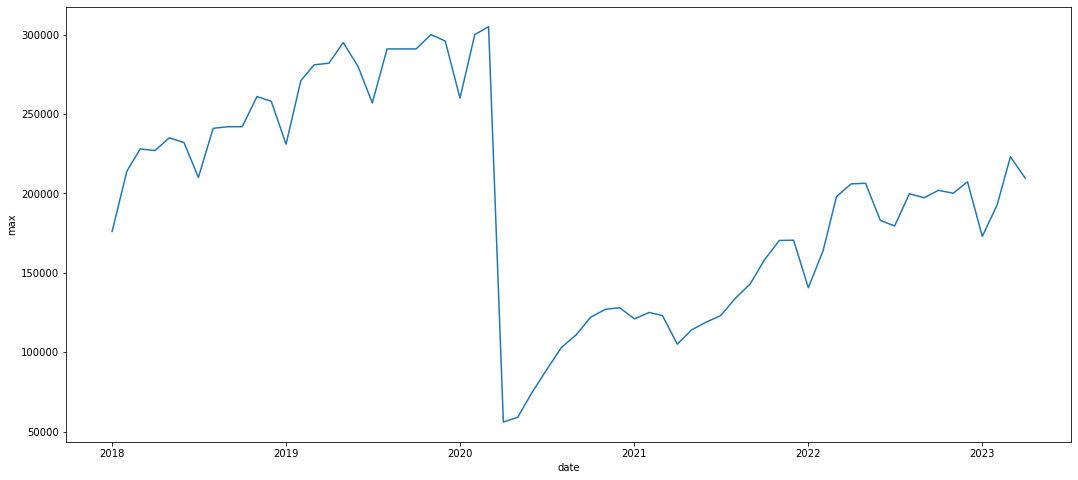

In [29]:
plt.figure(figsize=(18,8))
sns.lineplot(data=l04_pel_complete, x="date", y="max")
plt.ticklabel_format(style="plain", axis="y")

In [31]:
l04_pel_complete.to_csv("final_datasets/l04_pel_complete.csv", index=False)

# L05 PEL data extraction

In [32]:
links_l05_pel = df_private_pel.query(
    "resource_name.str.contains('Entrada de passageiros pelas linhas de bloqueio')"
     "& resource_name.str.contains('201[89]|202[0123]')"
     "& line == 5"
).reset_index(drop=True)
links_l05_pel.head()

,resource_name,resource_link,file_type,line
0,Entrada de passageiros pelas linhas de bloquei...,https://www.viamobilidade.com.br/assets/viamob...,pdf,5
1,Entrada de passageiros pelas linhas de bloquei...,https://www.viamobilidade.com.br/assets/viamob...,pdf,5
2,Entrada de passageiros pelas linhas de bloquei...,https://www.viamobilidade.com.br/assets/viamob...,pdf,5
3,Entrada de passageiros pelas linhas de bloquei...,https://www.viamobilidade.com.br/assets/viamob...,pdf,5
4,Entrada de passageiros pelas linhas de bloquei...,https://www.viamobilidade.com.br/assets/viamob...,pdf,5


In [12]:
links_l05_pel["resource_link"].to_list()

['https://www.viamobilidade.com.br/assets/viamobilidade/ccr-viamobilidade/public/media/page/passengers/files/20211203111824056-Passageiros_bloqueio_Dez2018.pdf',
 'https://www.viamobilidade.com.br/assets/viamobilidade/ccr-viamobilidade/public/media/page/passengers/files/20211203111800982-Passageiros_bloqueio_Nov2018.pdf',
 'https://www.viamobilidade.com.br/assets/viamobilidade/ccr-viamobilidade/public/media/page/passengers/files/20211203111740582-Passageiros_bloqueio_Out2018.pdf',
 'https://www.viamobilidade.com.br/assets/viamobilidade/ccr-viamobilidade/public/media/page/passengers/files/20211203111722067-Passageiros_bloqueio_Set2018.pdf',
 'https://www.viamobilidade.com.br/assets/viamobilidade/ccr-viamobilidade/public/media/page/passengers/files/20220613152301376-08_Entrada de passageiros pelas linhas de bloqueio.pdf',
 'https://www.viamobilidade.com.br/assets/viamobilidade/ccr-viamobilidade/public/media/page/passengers/files/20211203111701278-Passageiros_bloqueio_Ago2018.pdf',
 'http

In [33]:
def l05_pel(url, date_raw):
    year = date_raw.split(" ")[2]
    month = month_map[date_raw.split(" ")[0][:3].lower()]
    df_raw = tabula.read_pdf(
        url,
        pages="all"
        )[0]
    df_raw = tabula.read_pdf(url, pages="all")[0]
    if df_raw["Linha 5 - Lilás"].dtype != float:
        #df_raw["Linha 5 - Lilás"] = df_raw["Linha 5 - Lilás"].astype(str).str.rstrip(".0").str.replace(".", "", regex=True)
    #else:
        df_raw["Linha 5 - Lilás"] = df_raw["Linha 5 - Lilás"].str.replace(".", "", regex=True).str.replace(",", ".", regex=True)
    df_raw["Linha 5 - Lilás"] = pd.to_numeric(df_raw["Linha 5 - Lilás"], errors="coerce") * 1000
    df_raw = df_raw.T[1:].rename(columns={0: "total", 1: "business_day_mean", 2: "saturday_mean", 3: "sunday_mean", 4: "max"})
    df_raw["date"] = pd.to_datetime(str(year) + str(month), format="%Y%m")
    df_raw["line"] = 5
    df_raw = df_raw[["date", "line", "total", "business_day_mean", "saturday_mean", "sunday_mean", "max"]].reset_index(drop=True)
    df_raw['total'] = pd.to_numeric(df_raw['total'], errors='coerce')
    df_raw['business_day_mean'] = pd.to_numeric(df_raw['business_day_mean'], errors='coerce')
    df_raw['saturday_mean'] = pd.to_numeric(df_raw['saturday_mean'], errors='coerce')
    df_raw['sunday_mean'] = pd.to_numeric(df_raw['sunday_mean'], errors='coerce')
    df_raw['max'] = pd.to_numeric(df_raw['max'], errors='coerce')
    
    return df_raw

In [34]:
results_l05_pel = []
for index, row in links_l05_pel.iterrows():
    resource_link = row["resource_link"]
    date_raw = row["resource_name"].split(" - ")[-1]
    df_processed = l05_pel(resource_link, date_raw)
    results_l05_pel.append(df_processed)

In [35]:
l05_pel_complete = pd.concat(results_l05_pel, ignore_index=True).sort_values("date")
l05_pel_complete

,date,line,total,business_day_mean,saturday_mean,sunday_mean,max
4,2018-08-01,5,4136.0,178000.0,99000.0,46000.0,187000.0
5,2018-08-01,5,4136.0,178000.0,99000.0,46000.0,187000.0
3,2018-09-01,5,4489.0,192000.0,103000.0,51000.0,202000.0
2,2018-10-01,5,5910.0,231000.0,120000.0,66000.0,263000.0
1,2018-11-01,5,6141.0,264000.0,138000.0,77000.0,286000.0
0,2018-12-01,5,6106.0,242000.0,154000.0,87000.0,288000.0
17,2019-01-01,5,7000.0,279000.0,156000.0,88000.0,303000.0
16,2019-02-01,5,7623.0,326000.0,181000.0,95000.0,346000.0
15,2019-03-01,5,8122.0,339000.0,184000.0,97000.0,352000.0
14,2019-04-01,5,8659.0,353000.0,186000.0,96000.0,363000.0


In [37]:
# fixing wrong scale for some importings
l05_pel_complete.loc[l05_pel_complete.query("total < business_day_mean").index, "total"] = l05_pel_complete.query("total < business_day_mean")["total"]*1000
l05_pel_complete

,date,line,total,business_day_mean,saturday_mean,sunday_mean,max
4,2018-08-01,5,4136000.0,178000.0,99000.0,46000.0,187000.0
5,2018-08-01,5,4136000.0,178000.0,99000.0,46000.0,187000.0
3,2018-09-01,5,4489000.0,192000.0,103000.0,51000.0,202000.0
2,2018-10-01,5,5910000.0,231000.0,120000.0,66000.0,263000.0
1,2018-11-01,5,6141000.0,264000.0,138000.0,77000.0,286000.0
0,2018-12-01,5,6106000.0,242000.0,154000.0,87000.0,288000.0
17,2019-01-01,5,7000000.0,279000.0,156000.0,88000.0,303000.0
16,2019-02-01,5,7623000.0,326000.0,181000.0,95000.0,346000.0
15,2019-03-01,5,8122000.0,339000.0,184000.0,97000.0,352000.0
14,2019-04-01,5,8659000.0,353000.0,186000.0,96000.0,363000.0


In [45]:
# removing data from one month with wrong data on the source
l05_pel_complete.loc[
    l05_pel_complete.query("date.dt.year == 2022 & date.dt.month == 10").index,
    "total"] = np.nan

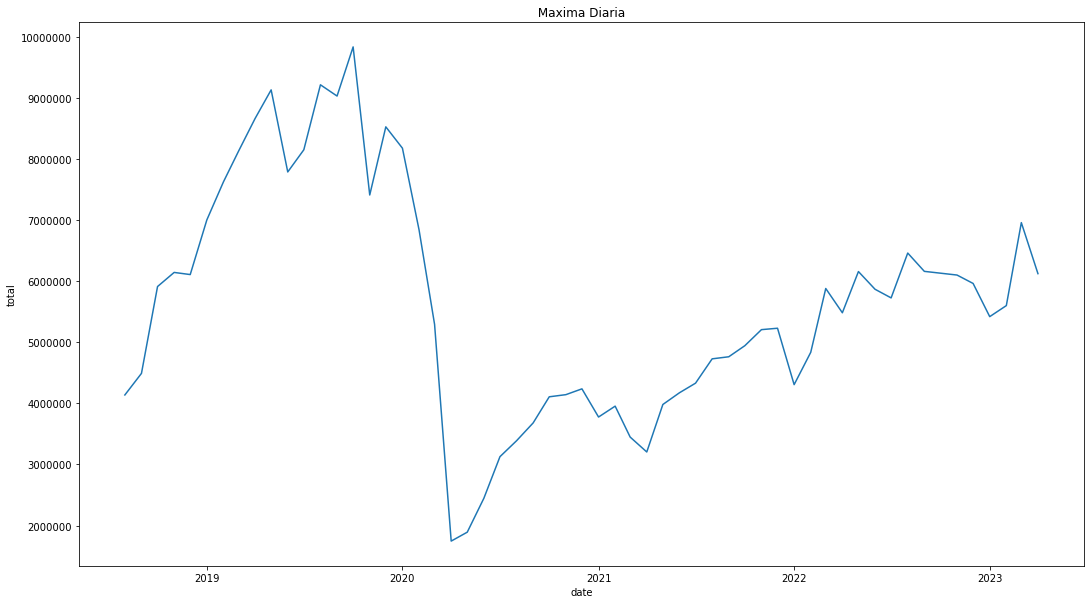

In [46]:
plt.figure(figsize=(18,10))
sns.lineplot(data=l05_pel_complete, x="date", y="total")
plt.title(" Maxima Diaria ")
plt.ticklabel_format(style="plain", axis="y");

In [47]:
l05_pel_complete.to_csv("final_datasets/l05_pel_complete.csv", index=False)